In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
bc = load_breast_cancer()

In [3]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

# Dataset Info

In [4]:
bc.target.shape

(569,)

In [5]:
bc.data.shape

(569, 30)

# Preprocessing

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=0.2)

In [7]:
print(f"Feature -> train: {X_train.shape} - test: {X_test.shape}")
print(f"Label -> train: {y_train.shape} - test: {y_test.shape}")

Feature -> train: (455, 30) - test: (114, 30)
Label -> train: (455,) - test: (114,)


In [8]:
# from sklearn.preprocessing import MinMaxScaler

# scalar = MinMaxScaler(feature_range=(0,1))

# X_train = scalar.fit_transform(X_train)
# X_test = scalar.transform(X_test)

# Classification

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test):
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)

    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)

    print(f"acc_train: {acc_train}, acc_test: {acc_test}, recall: {recall}, precision: {precision}")

    return acc_train, acc_test, precision, recall

1. Naive Bayes

In [10]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [11]:
y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)

acc_train_gnb, acc_test_gnb, p_gnb, r_gnb = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.9472527472527472, acc_test: 0.8947368421052632, recall: 0.9473684210526315, precision: 0.9


2. KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree', leaf_size=28)
knn.fit(X_train, y_train)

,n_neighbors,8
,weights,'uniform'
,algorithm,'kd_tree'
,leaf_size,28
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [15]:
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

acc_train_knn, acc_test_knn, p_knn, r_knn = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.9428571428571428, acc_test: 0.9473684210526315, recall: 0.9868421052631579, precision: 0.9375


3. Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=64, min_samples_split=6)

dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,64
,min_samples_split,6
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [17]:
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

acc_train_dt, acc_test_dt, p_dt, r_dt = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.9956043956043956, acc_test: 0.9122807017543859, recall: 0.9473684210526315, precision: 0.9230769230769231


4. Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, max_depth=64, min_samples_split=8)
rf.fit(X_train, y_train)

,n_estimators,500
,criterion,'gini'
,max_depth,64
,min_samples_split,8
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [19]:
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

acc_train_rf, acc_test_rf, p_rf, r_rf = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.9956043956043956, acc_test: 0.9210526315789473, recall: 0.9605263157894737, precision: 0.9240506329113924


5. SVM

In [20]:
from sklearn.svm import SVC

svm = SVC(kernel="poly")

svm.fit(X_train, y_train)

,C,1.0
,kernel,'poly'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [22]:
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

acc_train_svm, acc_test_svm, p_svm, r_svm = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.9010989010989011, acc_test: 0.9210526315789473, recall: 0.9868421052631579, precision: 0.9036144578313253


6. Logistic Regression

In [23]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler(feature_range=(0,1))

X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [25]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [26]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

acc_train_lr, acc_test_lr, p_lr, r_lr = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.9736263736263736, acc_test: 0.9210526315789473, recall: 0.9868421052631579, precision: 0.9036144578313253


7. ANN

In [27]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes=500, activation='relu', solver='adam')
ann.fit(X_train, y_train)

c:\Users\Hossein\Desktop\BreastCancer_Detection\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,hidden_layer_sizes,500
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,200
,shuffle,True
,random_state,None


In [28]:
y_pred_train = ann.predict(X_train)
y_pred_test = ann.predict(X_test)

acc_train_ann, acc_test_ann, p_ann, r_ann = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.989010989010989, acc_test: 0.9824561403508771, recall: 1.0, precision: 0.9743589743589743


# Comparison

In [29]:
acc_train = [acc_train_gnb, acc_train_knn, acc_train_dt, acc_train_rf, acc_train_svm, acc_train_lr, acc_train_ann]

title = ["GNB", "KNN", "Decision Tree", "RF", "SVM", "LR", "ANN"]

colors = ["black", "red", "yellow", "brown", "blue", "grey", "green"]

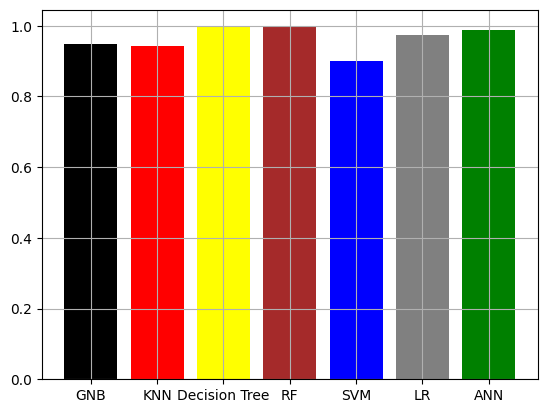

In [30]:
import matplotlib.pyplot as plt

plt.bar(title, acc_train, color=colors)
plt.grid()

In [32]:
acc_test = [acc_test_gnb, acc_test_knn, acc_test_dt, acc_test_rf, acc_test_svm, acc_test_lr, acc_test_ann]

title = ["GNB", "KNN", "Decision Tree", "RF", "SVM", "LR", "ANN"]

colors = ["black", "red", "yellow", "brown", "blue", "grey", "green"]

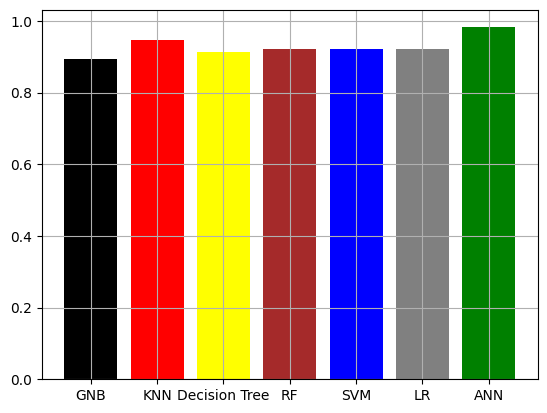

In [33]:
plt.bar(title, acc_test, color=colors)
plt.grid()

In [34]:
precision = [p_gnb, p_knn, p_dt, p_rf, p_svm, p_lr, p_ann]

title = ["GNB", "KNN", "Decision Tree", "RF", "SVM", "LR", "ANN"]

colors = ["black", "red", "yellow", "brown", "blue", "grey", "green"]

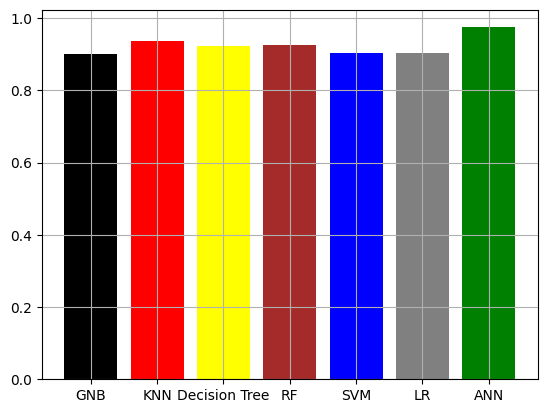

In [35]:
plt.bar(title, precision, color=colors)
plt.grid()

In [36]:
recall = [r_gnb, r_knn, r_dt, r_rf, r_svm, r_lr, r_ann]

title = ["GNB", "KNN", "Decision Tree", "RF", "SVM", "LR", "ANN"]

colors = ["black", "red", "yellow", "brown", "blue", "grey", "green"]

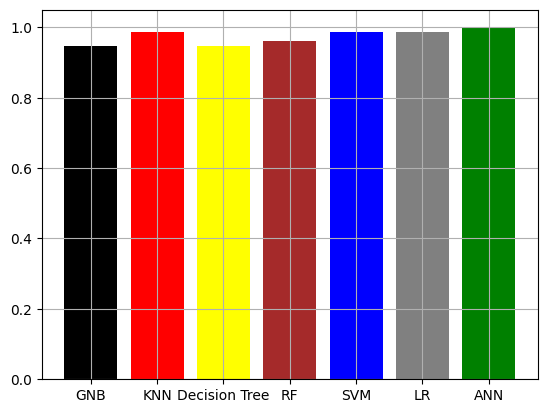

In [37]:
plt.bar(title, recall, color=colors)
plt.grid()